# Simulation    

In [9]:
import numpy as np
n = 1000

würfe = np.random.randint(1, 7, size=(n,2))

summe = np.sum(würfe, axis=1)
prob = np.sum(summe == 9) / n
prob


0.12

In [10]:
def is_head():
    return np.random.uniform() < 0.6

[is_head() for _ in range(10)]

[False, True, False, True, False, True, True, False, False, False]

In [25]:
cfs = np.array([-3000, 1000, 1000, 1000, 1000])
i = 0.05 
 # Berechnung des Kapitalwerts
ts = np.array([0, 1, 2, 3, 4])
npv = np.sum(cfs/(1+i)**ts)
npv

545.9505041623601

In [26]:
invest = -3000
cfs = np.random.normal(loc=1000, scale=100, size=4) # 4 Cashflows aus einer Normalverteilung
cfs = np.hstack((invest, cfs)) # Verknüpfen der Investition mit den Cashflows 34
 # Berechnung des Kapitalwerts
ts = np.array([0, 1, 2, 3, 4])
npv = np.sum(cfs/(1+i)**ts)
npv

627.4441358351505

In [27]:
# Generiere 1.000 Cashflowreihen
n = 10_000

invest = np.repeat(-3000, n)
cfs = np.random.normal(loc=1000, scale=100, size=(n,4))
cfs = np.c_[invest, cfs] 
# Berechne NPV für alle 1.000 Cashflowreihen
ts = np.arange(cfs.shape[1])
npvs = np.sum(cfs/(1+i)**ts, axis=1)

In [20]:
def play_game():
    capital = 25
    for _ in range(300):
        bet = 1 # Einsatz immer 1 Euro
        if is_head():
            capital += bet
        else:
            capital -= bet

        if capital == 0:
            return 0
        if capital == 250:
            return 250
    return capital

n = 1000
gewinne = [play_game() for _ in range(n)]
print(np.mean(gewinne))

85.442


In [28]:
def play_game_fixed():
    capital = 25
    for _ in range(300):
        bet = 0.1 * capital # Einsatz immer 1 Euro
        if is_head():
            capital += bet
        else:
            capital -= bet

        if capital == 0:
            return 0
        if capital == 250:
            return 250
    return capital

n = 1000
gewinne = [play_game() for _ in range(n)]
print(np.mean(gewinne))

84.774


In [30]:
def play_game(strategy, capital, max_rounds, **kwargs):
    for i in range(max_rounds): 
        
        bet = strategy(capital, **kwargs) # strategy implementiert die Strategie mit einer be
        if is_head():
            capital += bet
        else:
            capital -= bet

        # Abbruchbedingungen
        if capital <= 0:
            return 0
        if capital >= 250:
            return 250
    return capital

In [31]:
def fixed_amount(capital, bet=1):
    return np.minimum(bet, capital) # wir setzen maximal so viel, wie wir Kapital haben

In [32]:
def fixed_percentage(capital, bet=0.1):
    return bet * capital

In [33]:
play_game(fixed_amount, capital=25, max_rounds=300, bet=1)

59

In [34]:
play_game(fixed_percentage, capital=25, max_rounds=300, bet=0.1)

250

In [35]:
s1 = [play_game(fixed_percentage, capital=25, max_rounds=300, bet=0.05) for _ in range(1000)]
s2 = [play_game(fixed_percentage, capital=25, max_rounds=300, bet=0.1) for _ in range(1000)]
s3 = [play_game(fixed_percentage, capital=25, max_rounds=300, bet=0.2) for _ in range(1000)]
s4 = [play_game(fixed_amount, capital=25, max_rounds=300, bet=1) for _ in range(1000)]
s5 = [play_game(fixed_amount, capital=25, max_rounds=300, bet=4.5) for _ in range(1000)]
s6 = [play_game(fixed_amount, capital=25, max_rounds=300, bet=15) for _ in range(1000)]

#print everything
print(np.mean(s1), np.median(s1), np.mean(np.array(s1) == 0), np.mean(np.array(s1) == 250))
print(np.mean(s2), np.median(s2), np.mean(np.array(s2) == 0), np.mean(np.array(s2) == 250))
print(np.mean(s3), np.median(s3), np.mean(np.array(s3) == 0), np.mean(np.array(s3) == 250))
print(np.mean(s4), np.median(s4), np.mean(np.array(s4) == 0), np.mean(np.array(s4) == 250))
print(np.mean(s5), np.median(s5), np.mean(np.array(s5) == 0), np.mean(np.array(s5) == 250))
print(np.mean(s6), np.median(s6), np.mean(np.array(s6) == 0), np.mean(np.array(s6) == 250))


216.39669712614187 250.0 0.0 0.697
241.6515513807866 250.0 0.0 0.946
236.56289657554856 250.0 0.0 0.936
84.114 85.0 0.0 0.0
214.404 250.0 0.108 0.729
128.25 250.0 0.487 0.513


In [37]:
import yfinance as yf

ticker = "EXS1.DE"
df = yf.download(ticker, period="max", interval="1d")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,75.739998,75.739998,75.739998,75.739998,72.934578,0
2008-01-03,75.349998,75.349998,75.349998,75.349998,72.559021,0
2008-01-04,74.400002,74.400002,74.400002,74.400002,71.644218,0
2008-01-07,74.480003,74.480003,74.480003,74.480003,71.721252,0
2008-01-08,74.800003,74.800003,74.800003,74.800003,72.029396,0


In [42]:
# Berechnung der Renditen
df["return"] = df["Adj Close"].pct_change()
# Fehlerhafte Werte entfernen
df = df.dropna()
df.head()

C:\Users\cicek\AppData\Local\Temp\ipykernel_16248\59761387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["return"] = df["Adj Close"].pct_change()


,Open,High,Low,Close,Adj Close,Volume,returns,return
Date,,,,,,,,
2008-01-04,74.400002,74.400002,74.400002,74.400002,71.644218,0,-0.012608,-0.012608
2008-01-07,74.480003,74.480003,74.480003,74.480003,71.721252,0,0.001075,0.001075
2008-01-08,74.800003,74.800003,74.800003,74.800003,72.029396,0,0.004296,0.004296
2008-01-09,74.160004,74.160004,74.160004,74.160004,71.413109,0,-0.008556,-0.008556
2008-01-10,73.489998,73.489998,73.489998,73.489998,70.767914,0,-0.009035,-0.009035


<Axes: xlabel='return', ylabel='Count'>

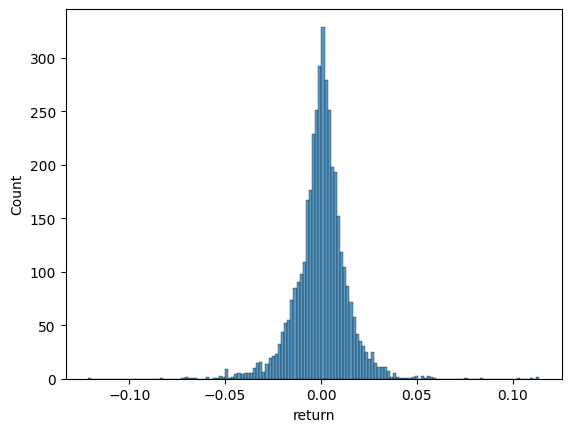

In [43]:
#histogram x rendite y anzahl with sns
import seaborn as sns
sns.histplot(df["return"])


<Axes: >

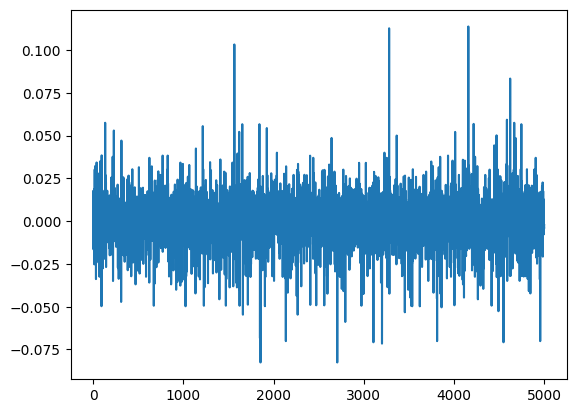

In [44]:
handelstage = 250
jahre = 20
t = handelstage * jahre

ret_sim = np.random.choice(df["return"], size=t)

cumret_sim = np.cumprod(1 + ret_sim) - 1

sns.lineplot(data= ret_sim)

Text(0, 0.5, 'Kumulierte Performance')

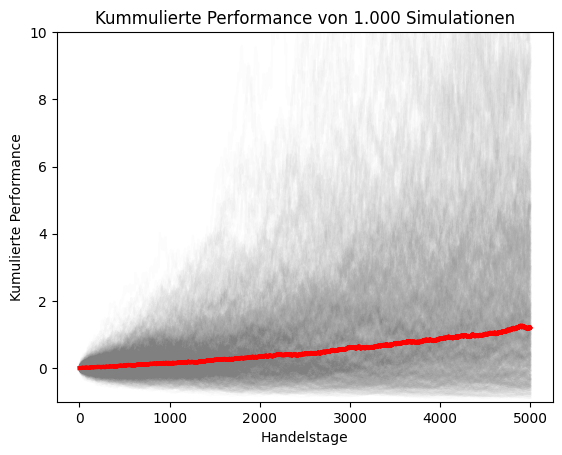

In [46]:
m = 1000

ret_sim = np.random.choice(df["return"], size=(t, m))

cumret_sim = np.cumprod(1 + ret_sim, axis=0) - 1

#Plot der kumulierten Renditen
plt.plot(cumret_sim, alpha=0.02, color="grey")
plt.plot(np.median(cumret_sim, axis=1), color="red", linewidth=3)
plt.ylim(-1, 10)
plt.title("Kummulierte Performance von 1.000 Simulationen")
plt.xlabel("Handelstage")
plt.ylabel("Kumulierte Performance")

(-0.01, 1.0)

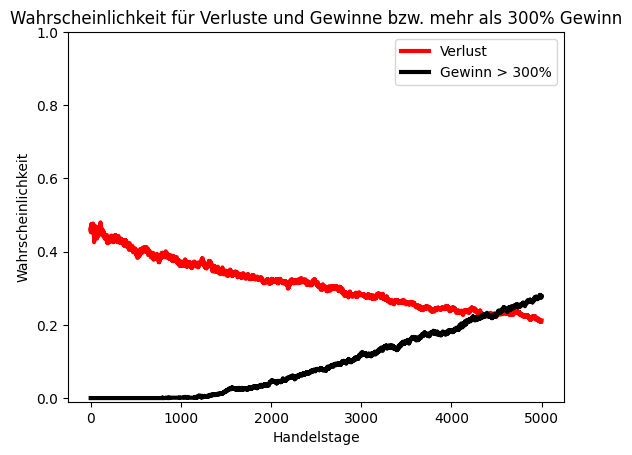

In [47]:
prob_loss = np.mean(cumret_sim < 0, axis=1)
prob_multiple = np.mean(cumret_sim > 3, axis=1)

plt.plot(prob_loss, c="red", linewidth=3)
plt.plot(prob_multiple, c="black", linewidth=3)
plt.title("Wahrscheinlichkeit für Verluste und Gewinne bzw. mehr als 300% Gewinn")
plt.xlabel("Handelstage")
plt.ylabel("Wahrscheinlichkeit")
plt.legend(["Verlust", "Gewinn > 300%"])
plt.ylim(-0.01, 1)